# Regression

Regression is the counterpart to classification, in which we deal with predicting numerical values as opposed to discrete categories. We start with the simplest of these.



## Linear regression

Regression is the major division in supervised ML dealing with predicting a continuous number, in contrast to classification which deals with putting a sample into a discrete bin. This could be anything as disparate as stock market prices to age estimation from brain scans, or appropriate dosage estimation of a drug etc. 

In this notebook you will become acquainted with linear regression in a ML framework. As per usual we start by importing the necessary packages.

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

plt.style.use('ggplot') #for visual style
%matplotlib inline

First we demonstrate how trivial it is to do linear regression using scikit-learn. Start by making a random linear data set using `make_regression`.

In [2]:
X, y, coef = make_regression(n_samples=20, n_features=1, 
                             n_informative=1, noise=5, 
                             coef=True, random_state=0)

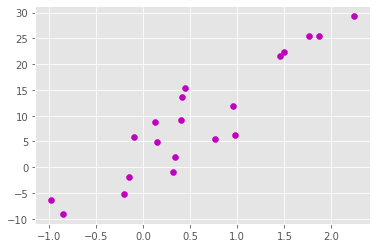

In [3]:
plt.scatter(X,y, c='m')

### Training a linear regression algorithm

In [4]:
lr = LinearRegression()
lr.fit(X, y)
y_hat = lr.predict(X)

#### Ex 1. Plot the linear regression line together with the data points.

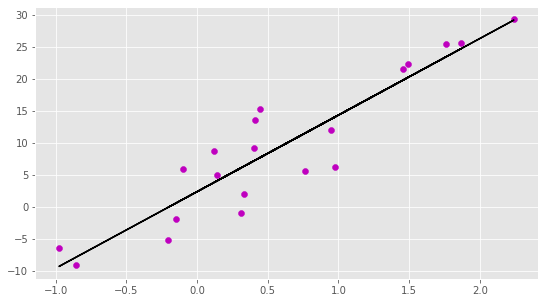

In [5]:
plt.figure(figsize=(9,5))
plt.scatter(X,y, c='m')
plt.plot(X, y_hat, c='k')

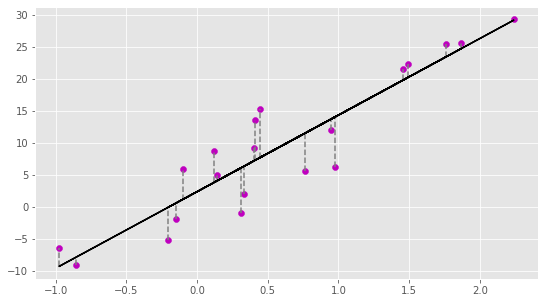

In [6]:
errors = y_hat-y
y_min = [min(v) for v in zip(y_hat, y)]
y_max = [max(v) for v in zip(y_hat, y)]

plt.figure(figsize=(9, 5))
plt.scatter(X,y, c='m')
plt.plot(X, y_hat, c='k')
plt.vlines(X, y_min, y_max, linestyle='dashed', color='gray')

### Non-linear regression using linear regression
While it sounds like a difficult task to generalize linear regression to higher order polynomials, this can be incorporated using the exact same algorithm with a clever trick. 

We can use a simple polynomial basis function using the `PolynomialFeatures` available from sklearn. For example, choosing degree=2, we obtain the following mapping.

$\Phi(x) = (1,x,x^2)$


Transforming the input features using $\Phi(x)$, we can retrain a linear regression model.

In [7]:
#https://scikit-learn.org/stable/tutorial/statistical_inference/supervised_learning.html#linear-model-from-regression-to-sparsity

A word on scikit-learn: everything in sklearn is treated in an object oriented manner. A machine learning model is an *object* which can be trained, used for prediction, and has many associated attributed (such as the model parameters etc.) Data transformers like `Polynomial Features` does also follow this paradigm. 

In [8]:
poly = PolynomialFeatures(2) #make a 
poly

PolynomialFeatures(degree=2, include_bias=True, interaction_only=False,
                   order='C')

The `fit_transform` method is used to transform X like below. Now instead of a vector, we have a matrix, where each row corresponds to the transformation of a single value in X. 

In [9]:
X_poly = poly.fit_transform(X)
X_poly

array([[ 1.        , -0.15135721,  0.022909  ],
       [ 1.        ,  0.40015721,  0.16012579],
       [ 1.        ,  0.97873798,  0.95792804],
       [ 1.        , -0.85409574,  0.72947953],
       [ 1.        , -0.97727788,  0.95507205],
       [ 1.        ,  0.3130677 ,  0.09801139],
       [ 1.        , -0.10321885,  0.01065413],
       [ 1.        , -0.20515826,  0.04208991],
       [ 1.        ,  0.33367433,  0.11133856],
       [ 1.        ,  1.49407907,  2.23227228],
       [ 1.        ,  0.95008842,  0.902668  ],
       [ 1.        ,  0.12167502,  0.01480481],
       [ 1.        ,  1.45427351,  2.11491143],
       [ 1.        ,  1.86755799,  3.48777285],
       [ 1.        ,  0.14404357,  0.02074855],
       [ 1.        ,  0.4105985 ,  0.16859113],
       [ 1.        ,  0.76103773,  0.57917842],
       [ 1.        ,  2.2408932 ,  5.02160233],
       [ 1.        ,  0.44386323,  0.19701457],
       [ 1.        ,  1.76405235,  3.11188068]])

In [10]:

X_poly = poly.fit_transform(X)
y2 = y**2

In [11]:
lr = LinearRegression()
lr.fit(X_poly, y2)
xs = np.linspace(X.min(), X.max(), 100)
xs = xs.reshape(-1,1)
xs_poly = poly.fit_transform(xs)
y2_hat = lr.predict(xs_poly)

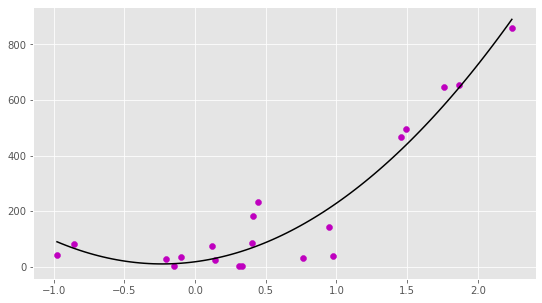

In [12]:
plt.figure(figsize=(9,5))
plt.scatter(X, y2, c='m')
plt.plot(xs, y2_hat, c='k')

So far we have sustained from using a training and testing just to make a point about basis functions, but now we can get into a more realistic example where you actually want to train and test your model. 

In [13]:
 # L1 and L2 and ELASTIC regression

## Diabetes 

Disease progression in a set of 442 diabetics was recorded along with phenotypical variables including age, body mass index and various blood measurements. Now we will try see if the progresssion is predictable from these measures.

In [14]:
from sklearn import datasets

In [15]:
diabetes = datasets.load_diabetes()

In [16]:
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - Age
      - Sex
      - Body mass index
      - Average blood pressure
      - S1
      - S2
      - S3
      - S4
      - S5
      - S6

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see:
Bra

In [17]:
X = diabetes.data # only use 2 features for visualization purposes
y = diabetes.target
names = diabetes.feature_names

#### Exercise. Plot BMI (x-axis) versus progression (y-axis) 

Text(0.5, 1.0, 'disease progression')

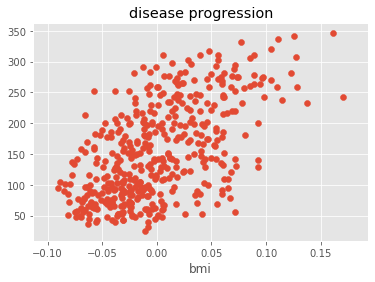

In [18]:
i = 2 # index of BMI
plt.scatter(X[:,i], y)
plt.xlabel(names[i])
plt.title('disease progression')

In [19]:
X.shape

(442, 10)

In [20]:
import pandas as pd
df = pd.DataFrame(data=X, columns=names)
df.loc[:,"prog"] = y
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,prog
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


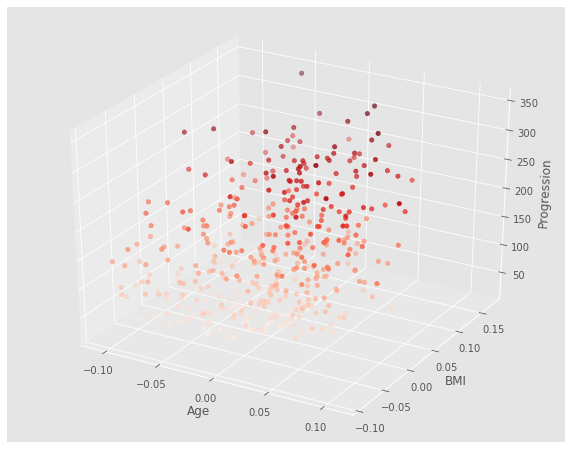

In [21]:
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection = '3d')

x = df['age']
y = df['bmi']
z = df['prog']

ax.set_xlabel("Age")
ax.set_ylabel("BMI")
ax.set_zlabel("Progression")

ax.scatter(x, y, z, c=z, cmap='Reds')

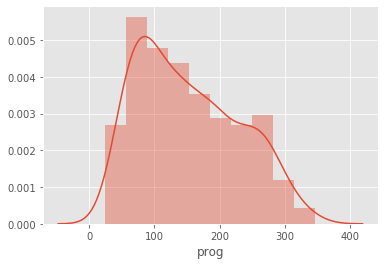

In [22]:
sns.distplot(df.prog)

In [23]:
np.set_printoptions(1)
np.corrcoef(df.drop(columns='prog').T.values)

array([[ 1. ,  0.2,  0.2,  0.3,  0.3,  0.2, -0.1,  0.2,  0.3,  0.3],
       [ 0.2,  1. ,  0.1,  0.2,  0. ,  0.1, -0.4,  0.3,  0.1,  0.2],
       [ 0.2,  0.1,  1. ,  0.4,  0.2,  0.3, -0.4,  0.4,  0.4,  0.4],
       [ 0.3,  0.2,  0.4,  1. ,  0.2,  0.2, -0.2,  0.3,  0.4,  0.4],
       [ 0.3,  0. ,  0.2,  0.2,  1. ,  0.9,  0.1,  0.5,  0.5,  0.3],
       [ 0.2,  0.1,  0.3,  0.2,  0.9,  1. , -0.2,  0.7,  0.3,  0.3],
       [-0.1, -0.4, -0.4, -0.2,  0.1, -0.2,  1. , -0.7, -0.4, -0.3],
       [ 0.2,  0.3,  0.4,  0.3,  0.5,  0.7, -0.7,  1. ,  0.6,  0.4],
       [ 0.3,  0.1,  0.4,  0.4,  0.5,  0.3, -0.4,  0.6,  1. ,  0.5],
       [ 0.3,  0.2,  0.4,  0.4,  0.3,  0.3, -0.3,  0.4,  0.5,  1. ]])

In [24]:
X[:4, :]

array([[ 0. ,  0.1,  0.1,  0. , -0. , -0. , -0. , -0. ,  0. , -0. ],
       [-0. , -0. , -0.1, -0. , -0. , -0. ,  0.1, -0. , -0.1, -0.1],
       [ 0.1,  0.1,  0. , -0. , -0. , -0. , -0. , -0. ,  0. , -0. ],
       [-0.1, -0. , -0. , -0. ,  0. ,  0. , -0. ,  0. ,  0. , -0. ]])

In [25]:
df.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,prog
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-3.639623e-16,1.309912e-16,-8.013951e-16,1.289818e-16,-9.042540e-17,1.301121e-16,-4.563971e-16,3.863174e-16,-3.848103e-16,-3.398488e-16,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123996e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260974e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665645e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324879e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670611e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947634e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564384e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243323e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320442e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335990e-01,1.356118e-01,346.000000


In [73]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline


In [66]:
from sklearn.model_selection import train_test_split

X = diabetes.data 
y = diabetes.target

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [67]:
for s in (X_train, y_train, X_test, y_test):
    print(s.shape)

(331, 10)
(331,)
(111, 10)
(111,)


In [74]:
scaler = StandardScaler()
linreg = LinearRegression()
pipeline = make_pipeline(scaler, linreg)
pipeline.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('linearregression',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

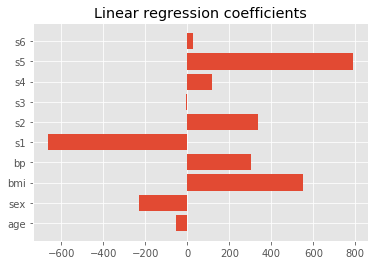

In [84]:
# visualize the coefficients
plt.barh(range(model.coef_.shape[0]),model.coef_)
plt.yticks(ticks=range(10),labels=diabetes.feature_names)
plt.title("Linear regression coefficients")
plt.show()

### Evaluating the regression model

In [86]:
model.score(X_test, y_test)

0.4746853276295301

In [87]:
pred = model.predict(X_test)
diff = y_test - pred
diff = diff / np.max(np.array([diff,pred]).shape, axis=0)

#np.max(np.array([diff,pred]).shape, axis=0)

#plt.bar(x=range(diff.shape[0]), height=diff) # 
#plt.ylim(-1, 1)

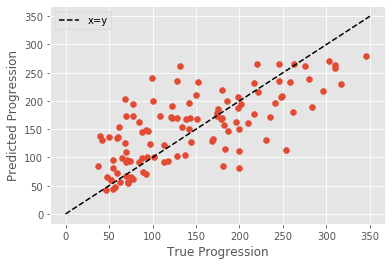

In [93]:
plt.scatter(y_test, pred)
plt.xlabel('True Progression')
plt.ylabel('Predicted Progression')
plt.plot([0,350],[0,350], c='k', ls='--', label='x=y')
plt.legend()

In [ ]:
# Todo: bounding boxes in images?
# https://sklearn-theano.github.io/auto_examples/plot_single_localization.html
# localize nuclei / count cells?
